<a href="https://colab.research.google.com/github/Khoa-hub-commits/ANN/blob/main/ti%E1%BB%81n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/money_dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 48 images belonging to 6 classes.
Found 12 images belonging to 6 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │    50,332,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,996,486 (194.54 MB)

 Trainable params: 50,993,414 (194.52 MB)

 Non-trainable params: 3,072 (12.00 KB)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.0903 - loss: 2.6184 - val_accuracy: 0.1667 - val_loss: 21.3798 - learning_rate: 0.0010
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3681 - loss: 2.3290 - val_accuracy: 0.1667 - val_loss: 26.8795 - learning_rate: 0.0010
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 982ms/step - accuracy: 0.2639 - loss: 1.9613 - val_accuracy: 0.1667 - val_loss: 27.2768 - learning_rate: 0.0010
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 931ms/step - accuracy: 0.2951 - loss: 2.1364 - val_accuracy: 0.1667 - val_loss: 22.6645 - learning_rate: 0.0010
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3403 - loss: 1.7777 - val_accuracy: 0.1667 - val_loss: 15.1990 - learning_rate: 0.0010
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 948ms/step - accuracy: 0.3299 - loss: 1.6676 - val_accuracy: 0.1667 - val_loss: 22.6810 - learning_rate: 0.0010
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3819 - loss: 1.4493 - val_accuracy:

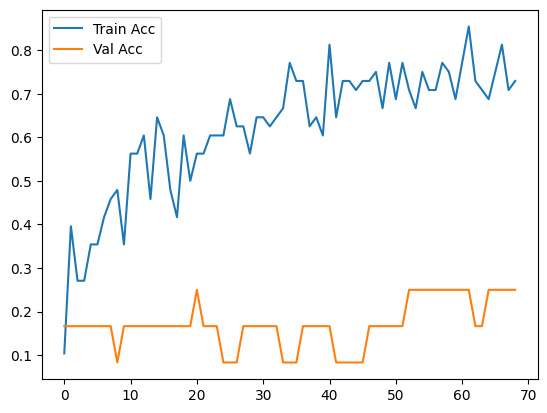

In [ ]:
# ================== TRAIN ANN PHÂN BIỆT TIỀN ==================
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Mount Google Drive
# ------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn dataset (đặt theo link drive của bạn)
DATASET_DIR = "/content/drive/MyDrive/money_dataset"

# ------------------------------------------------------------
# 2) Load dataset với ImageDataGenerator
# ------------------------------------------------------------
img_size = (128, 128)
batch_size = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_ds = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ------------------------------------------------------------
# 3) Xây ANN model (Sequential) cải tiến
# ------------------------------------------------------------
model = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(len(train_ds.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()
# ------------------------------------------------------------
# 4) Train model
# ------------------------------------------------------------
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=200,
    callbacks=callbacks
)

# ------------------------------------------------------------
# 5) Vẽ kết quả
# ------------------------------------------------------------
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

# ------------------------------------------------------------
# 6) Lưu model
# ------------------------------------------------------------
model.save("/content/drive/MyDrive/money_ann_model.h5")

# ------------------------------------------------------------
# 7) Hàm dự đoán
# ------------------------------------------------------------
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_names = list(train_ds.class_indices.keys())
    return class_names[np.argmax(pred)], np.max(pred)

# Ví dụ:
# print(predict_image("/content/drive/MyDrive/test.jpg"))


In [ ]:
# ================== UPLOAD & PREDICT ==================
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load lại model đã train xong (nếu cần)
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/money_ann_model.h5")

# Class names (lấy từ train_ds trước đó)
class_names = list(train_ds.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)
    pred_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    # Hiển thị ảnh + kết quả
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Kết quả: {pred_class} ({confidence:.2f})")
    plt.show()

    return pred_class, confidence

# Vòng lặp upload nhiều ảnh
while True:
    print("Hãy chọn ảnh cần kiểm tra (hoặc nhấn 'Cancel' để dừng).")
    uploaded = files.upload()
    if not uploaded:  # Nếu không chọn ảnh thì thoát
        print("Kết thúc upload.")
        break

    for filename in uploaded.keys():
        print(f"\nẢnh: {filename}")
        label, conf = predict_image(filename)
        print(f"--> Dự đoán: {label} (độ tin cậy {conf:.2f})")


Hãy chọn ảnh cần kiểm tra (hoặc nhấn 'Cancel' để dừng).


Kết thúc upload.


In [ ]:
# ================== GIAO DIỆN PREDICT ==================
import ipywidgets as widgets
from IPython.display import display, clear_output
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load lại model đã train
model = load_model("/content/drive/MyDrive/money_ann_model.h5")

# Class names lấy từ training
class_names = list(train_ds.class_indices.keys())

# Kích thước ảnh đầu vào
img_size = (128, 128)

# --------- Hàm dự đoán ---------
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)
    pred_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)
    return pred_class, confidence

# --------- Widgets giao diện ---------
upload_btn = widgets.FileUpload(
    accept='image/*',
    multiple=True,
    description="📂 Upload ảnh",
    style={'button_color': '#009688', 'description_width': 'initial'}
)

out = widgets.Output()

def on_upload_change(change):
    out.clear_output()
    with out:
        for filename, file_info in upload_btn.value.items():
            # Lưu file tạm
            with open(filename, "wb") as f:
                f.write(file_info['content'])

            # Dự đoán
            label, conf = predict_image(filename)

            # Hiển thị ảnh + kết quả
            fig, ax = plt.subplots(figsize=(4,4))
            img = image.load_img(filename)
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(f"{label} ({conf:.2f})", fontsize=14, color="gold")
            plt.show()

upload_btn.observe(on_upload_change, names='value')

# --------- Hiển thị giao diện ---------
title = widgets.HTML("<h2 style='color:#009688'>💵 Nhận diện tiền Việt Nam bằng AI</h2>")
description = widgets.HTML("<p style='color:gray'>Upload ảnh tờ tiền để AI dự đoán mệnh giá.</p>")

display(title, description, upload_btn, out)


HTML(value="<h2 style='color:#009688'>💵 Nhận diện tiền Việt Nam bằng AI</h2>")

HTML(value="<p style='color:gray'>Upload ảnh tờ tiền để AI dự đoán mệnh giá.</p>")

FileUpload(value={}, accept='image/*', description='📂 Upload ảnh', multiple=True, style=ButtonStyle(button_col…

Output()